<a href="https://colab.research.google.com/github/DuongDuyThoai/bai-tap-AI/blob/main/nhandienhoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/gdrive/MyDrive/nhan_dien_hoa

/content/gdrive/MyDrive/nhan_dien_hoa


In [ ]:
!ls /content/gdrive/MyDrive/nhan_dien_hoa

test  train


In [ ]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/gdrive/MyDrive/nhan_dien_hoa/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 75 images belonging to 3 classes.


In [ ]:
test_set = train_data.flow_from_directory('/content/gdrive/MyDrive/nhan_dien_hoa/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 15 images belonging to 3 classes.


In [ ]:
train_set.class_indices

{'hoa cam tu cau': 0, 'hoa hong': 1, 'hoa ly': 2}

In [ ]:
test_set.class_indices

{'camtucau': 0, 'hoahong': 1, 'hoaly': 2}

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
3/3 [==============================] - 19s 5s/step - loss: 12.5322 - accuracy: 0.2933 - val_loss: 2.2335 - val_accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 1s 394ms/step - loss: 1.8244 - accuracy: 0.2800 - val_loss: 1.0835 - val_accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - 1s 210ms/step - loss: 1.0597 - accuracy: 0.4667 - val_loss: 1.1441 - val_accuracy: 0.3333
Epoch 4/100
3/3 [==============================] - 1s 216ms/step - loss: 1.1573 - accuracy: 0.3733 - val_loss: 0.9543 - val_accuracy: 0.6000
Epoch 5/100
3/3 [==============================] - 1s 220ms/step - loss: 0.9429 - accuracy: 0.6133 - val_loss: 0.8143 - val_accuracy: 0.7333
Epoch 6/100
3/3 [==============================] - 1s 316ms/step - loss: 0.8018 - accuracy: 0.7467 - val_loss: 0.6180 - val_accuracy: 0.7333
Epoch 7/100
3/3 [==============================] - 1s 312ms/step - loss: 0.8966 - accuracy: 0.5200 - val_loss: 0.5642 - val_accuracy: 0.7333
Epoch 8/100
3/

In [ ]:
model.save('Nhan_dien_hoa.h5')

In [ ]:
model_hoa = load_model('Nhan_dien_hoa.h5')

In [ ]:
Score=model.evaluate(train_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.005270752124488354
Train Accuracy 1.0


1/1 [==============================] - 0s 85ms/step
Đây là hoa: camtucau


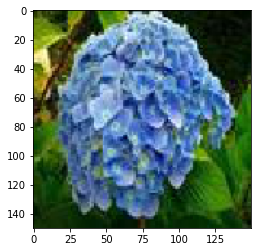

In [ ]:
img = load_img('/content/camtucau (3).jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_hoa.predict(img)
class_hoa=['camtucau','hong','ly']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là hoa:", class_hoa[a])